In [ ]:
import pandas as pd
import re

In [ ]:
df=pd.read_csv('/content/Sentiment_Stock_data.csv',index_col=0)

In [ ]:
# Preprocessing function (including tokenization and text normalization)
def preprocess_and_tokenize(text):
    if isinstance(text, str):  # Ensure text is a string
        # Keep numeric values (including decimal numbers) and preserve other characters like %, commas, and periods
        text = re.sub(r'([a-zA-Z]+)', lambda x: x.group(0).lower(), text)  # lowercase alphabetic characters

        # Remove non-alphanumeric characters except spaces, numbers, %, commas, and periods
        text = re.sub(r'[^a-zA-Z0-9\s%,\.]', '', text)  # Keep %, commas, periods, and numbers

        # Tokenize text by splitting on spaces
        tokens = text.split()

        # Manually defined stopwords list (common words to remove)
        stop_words = set([
            'the', 'a', 'an', 'and', 'of', 'in', 'to', 'for', 'on', 'at', 'by', 'with', 'as', 'this', 'that',
            'which', 'it', 'is', 'was', 'were', 'be', 'been', 'being', 'has', 'have', 'had', 'having', 'from',
            'or', 'but', 'not', 'are', 'were', 'so', 'if', 'than', 'then', 'too', 'very', 'just', 'more', 'will',
            'can', 'could', 'now', 'all', 'any', 'some', 'many', 'few'
        ])

        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]

        return ' '.join(tokens)
    else:
        return ""  # Return empty string if it's not a string


In [ ]:
df['Cleaned_Sentence'] = df['Sentence'].apply(preprocess_and_tokenize)

In [ ]:
df[['Cleaned_Sentence','Sentence']].head()

,Cleaned_Sentence,Sentence
0,"according gran , company no plans move product...","According to Gran , the company has no plans t..."
1,"last quarter 2010 , componenta s net sales dou...","For the last quarter of 2010 , Componenta 's n..."
2,"third quarter 2010 , net sales increased 5.2 %...","In the third quarter of 2010 , net sales incre..."
3,operating profit rose eur 13.1 mn eur 8.7 mn c...,Operating profit rose to EUR 13.1 mn from EUR ...
4,"operating profit totalled eur 21.1 mn , up eur...","Operating profit totalled EUR 21.1 mn , up fro..."


In [ ]:
import spacy
import torch
from transformers import pipeline
!pip install stanfordnlp
import stanfordnlp
import re

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
# Initialize the spaCy model
spacy_nlp = spacy.load("en_core_web_sm")

# Initialize Hugging Face's BERT-based NER pipeline
hf_ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")

# Initialize StanfordNLP (Note: download once, use later)
stanfordnlp.download('en')
stanford_nlp = stanfordnlp.Pipeline()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
Y

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.


Download location: /root/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 235M/235M [00:41<00:00, 5.67MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}


/usr/local/lib/python3.11/dist-packages/stanfordnlp/models/tokenize/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, lambda sto

---
Loading: lemma
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}


/usr/local/lib/python3.11/dist-packages/stanfordnlp/models/lemma/trainer.py:195: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, lambda stora

Done loading processors!
---


In [ ]:
# Named Entity Recognition with spaCy
def extract_entities_spacy(text):
    doc = spacy_nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [ ]:
df['Entities_SpaCy'] = df['Cleaned_Sentence'].apply(extract_entities_spacy)

In [ ]:
df.head()

,Sentiment,Sentence,Cleaned_Sentence,Entities_SpaCy
0,0,"According to Gran , the company has no plans t...","according gran , company no plans move product...","[(according gran, PERSON), (russia, GPE)]"
1,1,"For the last quarter of 2010 , Componenta 's n...","last quarter 2010 , componenta s net sales dou...","[(last quarter 2010, DATE), (componenta s, ORG..."
2,1,"In the third quarter of 2010 , net sales incre...","third quarter 2010 , net sales increased 5.2 %...","[(third quarter 2010, DATE), (5.2 %, PERCENT),..."
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose eur 13.1 mn eur 8.7 mn c...,"[(13.1, CARDINAL), (8.7, CARDINAL), (2007, DAT..."
4,1,"Operating profit totalled EUR 21.1 mn , up fro...","operating profit totalled eur 21.1 mn , up eur...","[(21.1, CARDINAL), (18.6, CARDINAL), (2007, DA..."


In [ ]:
def extract_entities(entity_list):
    entities = []
    for item in entity_list:  # No need for eval here
        entities.append(item[0].strip())
    return entities

# Extract all entities from the column
all_entities = []
for row in df['Entities_SpaCy']:
    all_entities.extend(extract_entities(row))

In [ ]:
# Count occurrences of each entity
from collections import Counter
entity_counts = Counter(all_entities)

# Convert to DataFrame for better readability
entity_count_df = pd.DataFrame(entity_counts.items(), columns=['Entity', 'Count'])
entity_count_df = entity_count_df.sort_values(by='Count', ascending=False)

In [ ]:
entity_count_df.head(20)

,Entity,Count
4273,israel,1661
1109,china,1588
611,first,1548
1,russia,1516
196,u.s.,1397
138,russian,1149
5522,israeli,1131
850,two,1055
1099,one,1051
1694,iran,1024


In [ ]:
# Named Entity Recognition with Hugging Face BERT
""" def extract_entities_bert(text):
    entities = hf_ner_pipeline(text)
    return [(entity['word'], entity['entity']) for entity in entities] """

In [ ]:
#df['Entities_BERT'] = df['Cleaned_Sentence'].apply(extract_entities_bert)

In [ ]:
# Named Entity Recognition with StanfordNLP
""" def extract_entities_stanford(text):
    doc = stanford_nlp(text)  # Process the text with StanfordNLP
    entities = []
    for sentence in doc.sentences:  # Iterate through sentences
        for word in sentence.tokens:  # Iterate through tokens
            for ner in word.words:  # Check NER tags
                if ner.ner != 'O':  # 'O' means no entity
                    entities.append((ner.text, ner.ner))
    return entities """

In [ ]:
#!pip install transformers

In [ ]:
""" from transformers import pipeline

# Load Hugging Face NER pipeline
ner_model = pipeline("ner", model="dslim/bert-base-NER", tokenizer="dslim/bert-base-NER", grouped_entities=True)

# Function to extract entities
def extract_entities_hf(text):
    if not isinstance(text, str) or text.strip() == '':
        return []  # Return empty list for invalid inputs
    entities = ner_model(text)  # Use the NER pipeline
    extracted = [(entity['word'], entity['entity_group']) for entity in entities]
    return extracted """


' from transformers import pipeline\n\n# Load Hugging Face NER pipeline\nner_model = pipeline("ner", model="dslim/bert-base-NER", tokenizer="dslim/bert-base-NER", grouped_entities=True)\n\n# Function to extract entities\ndef extract_entities_hf(text):\n    if not isinstance(text, str) or text.strip() == \'\':\n        return []  # Return empty list for invalid inputs\n    entities = ner_model(text)  # Use the NER pipeline\n    extracted = [(entity[\'word\'], entity[\'entity_group\']) for entity in entities]\n    return extracted '

In [ ]:
# Apply Hugging Face NER
#df['Entities_HuggingFace'] = df['Cleaned_Sentence'].apply(extract_entities_hf)

In [ ]:
# Function for dependency parsing with SpaCy
nlp = spacy.load("en_core_web_sm")
def extract_dependencies_spacy(text):
    if not isinstance(text, str) or text.strip() == '':
        return []  # Return empty list for invalid inputs
    doc = nlp(text)
    dependencies = []
    for token in doc:
        dependencies.append((token.text, token.dep_, token.head.text, token.head.pos_))
    return dependencies

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
# Apply Dependency Parsing
df['Dependencies_SpaCy'] = df['Cleaned_Sentence'].apply(extract_dependencies_spacy)

In [ ]:
df['Dependencies_SpaCy'][0]

[('according', 'prep', 'move', 'VERB'),
 ('gran', 'pobj', 'according', 'VERB'),
 (',', 'punct', 'move', 'VERB'),
 ('company', 'compound', 'plans', 'NOUN'),
 ('no', 'det', 'plans', 'NOUN'),
 ('plans', 'nsubj', 'move', 'VERB'),
 ('move', 'ROOT', 'move', 'VERB'),
 ('production', 'compound', 'russia', 'PROPN'),
 ('russia', 'dobj', 'move', 'VERB'),
 (',', 'punct', 'move', 'VERB'),
 ('although', 'prep', 'move', 'VERB'),
 ('where', 'advmod', 'growing', 'VERB'),
 ('company', 'nsubj', 'growing', 'VERB'),
 ('growing', 'pcomp', 'although', 'SCONJ')]

In [ ]:
# Function to link sentiment with extracted entities
def analyze_sentiment_context(text, sentiment):
    if not isinstance(text, str) or text.strip() == '':
        return []  # Skip invalid inputs
    doc = nlp(text)
    sentiment_context = []
    for ent in doc.ents:
        sentiment_context.append({
            "Entity": ent.text,
            "Label": ent.label_,
            "Sentiment": "Positive" if sentiment == 1 else "Negative"
        })
    return sentiment_context

In [ ]:
# Apply contextual sentiment analysis
df['Sentiment_Context'] = df.apply(lambda row: analyze_sentiment_context(row['Cleaned_Sentence'], row['Sentiment']), axis=1)

In [ ]:
df.head()

,Sentiment,Sentence,Cleaned_Sentence,Entities_SpaCy,Dependencies_SpaCy,Sentiment_Context
0,0,"According to Gran , the company has no plans t...","according gran , company no plans move product...","[(according gran, PERSON), (russia, GPE)]","[(according, prep, move, VERB), (gran, pobj, a...","[{'Entity': 'according gran', 'Label': 'PERSON..."
1,1,"For the last quarter of 2010 , Componenta 's n...","last quarter 2010 , componenta s net sales dou...","[(last quarter 2010, DATE), (componenta s, ORG...","[(last, amod, quarter, NOUN), (quarter, npadvm...","[{'Entity': 'last quarter 2010', 'Label': 'DAT..."
2,1,"In the third quarter of 2010 , net sales incre...","third quarter 2010 , net sales increased 5.2 %...","[(third quarter 2010, DATE), (5.2 %, PERCENT),...","[(third, amod, quarter, NOUN), (quarter, npadv...","[{'Entity': 'third quarter 2010', 'Label': 'DA..."
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose eur 13.1 mn eur 8.7 mn c...,"[(13.1, CARDINAL), (8.7, CARDINAL), (2007, DAT...","[(operating, compound, profit, NOUN), (profit,...","[{'Entity': '13.1', 'Label': 'CARDINAL', 'Sent..."
4,1,"Operating profit totalled EUR 21.1 mn , up fro...","operating profit totalled eur 21.1 mn , up eur...","[(21.1, CARDINAL), (18.6, CARDINAL), (2007, DA...","[(operating, amod, profit, NOUN), (profit, nsu...","[{'Entity': '21.1', 'Label': 'CARDINAL', 'Sent..."


In [ ]:
df['Sentiment_Context'][0]

[{'Entity': 'according gran', 'Label': 'PERSON', 'Sentiment': 'Negative'},
 {'Entity': 'russia', 'Label': 'GPE', 'Sentiment': 'Negative'}]

In [ ]:
# Function to extract dependency parsing information
def extract_dependency_info(text):
    if not isinstance(text, str) or text.strip() == '':
        return []  # Handle invalid inputs
    doc = nlp(text)
    dependencies = []
    for token in doc:
        dependencies.append({
            "Token": token.text,          # The word itself
            "Dependency": token.dep_,     # Dependency type (e.g., nsubj, dobj, etc.)
            "Head": token.head.text,      # The word this token depends on
            "Head POS": token.head.pos_,  # Part of speech of the head word
            "Children": [child.text for child in token.children]  # Child tokens of this word
        })
    return dependencies

In [ ]:
# Apply dependency parsing to each cleaned sentence
df['Dependency_Info'] = df['Cleaned_Sentence'].apply(extract_dependency_info)

In [ ]:
df['Dependency_Info'][0]

[{'Token': 'according',
  'Dependency': 'prep',
  'Head': 'move',
  'Head POS': 'VERB',
  'Children': ['gran']},
 {'Token': 'gran',
  'Dependency': 'pobj',
  'Head': 'according',
  'Head POS': 'VERB',
  'Children': []},
 {'Token': ',',
  'Dependency': 'punct',
  'Head': 'move',
  'Head POS': 'VERB',
  'Children': []},
 {'Token': 'company',
  'Dependency': 'compound',
  'Head': 'plans',
  'Head POS': 'NOUN',
  'Children': []},
 {'Token': 'no',
  'Dependency': 'det',
  'Head': 'plans',
  'Head POS': 'NOUN',
  'Children': []},
 {'Token': 'plans',
  'Dependency': 'nsubj',
  'Head': 'move',
  'Head POS': 'VERB',
  'Children': ['company', 'no']},
 {'Token': 'move',
  'Dependency': 'ROOT',
  'Head': 'move',
  'Head POS': 'VERB',
  'Children': ['according', ',', 'plans', 'russia', ',', 'although']},
 {'Token': 'production',
  'Dependency': 'compound',
  'Head': 'russia',
  'Head POS': 'PROPN',
  'Children': []},
 {'Token': 'russia',
  'Dependency': 'dobj',
  'Head': 'move',
  'Head POS': 'VERB

In [ ]:
from spacy import displacy

# Function to visualize dependency parsing for a single sentence
def visualize_dependencies(text):
    if not isinstance(text, str) or text.strip() == '':
        print("Invalid input!")
        return
    doc = nlp(text)
    displacy.render(doc, style="dep", jupyter=True)


In [ ]:
visualize_dependencies(df['Cleaned_Sentence'][0])

In [ ]:
# Function to link entities with sentiment and dependencies
def analyze_entity_sentiment(text, sentiment):
    if not isinstance(text, str) or text.strip() == '':
        return []

    doc = nlp(text)
    entity_sentiments = []

    for ent in doc.ents:
        # Find the verb/root associated with the entity
        root = [token for token in doc if token.head == token and ent.root in token.subtree]
        root = root[0].text if root else "None"

        entity_sentiments.append({
            "Entity": ent.text,
            "Entity_Label": ent.label_,
            "Associated_Root": root,
            "Sentiment": "Positive" if sentiment == 1 else "Negative"
        })

    return entity_sentiments

In [ ]:
# Apply the function
df['Entity_Sentiment_Context'] = df.apply(lambda row: analyze_entity_sentiment(row['Cleaned_Sentence'], row['Sentiment']), axis=1)

In [ ]:
df['Entity_Sentiment_Context'][0]

[{'Entity': 'according gran',
  'Entity_Label': 'PERSON',
  'Associated_Root': 'move',
  'Sentiment': 'Negative'},
 {'Entity': 'russia',
  'Entity_Label': 'GPE',
  'Associated_Root': 'move',
  'Sentiment': 'Negative'}]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a semantic graph for a sentence
def create_semantic_graph_with_sentiment(text, sentiment):
    if not isinstance(text, str) or text.strip() == '':
        return None

    doc = nlp(text)
    graph = nx.DiGraph()

    # Add nodes and edges based on dependency parsing
    for token in doc:
        graph.add_node(token.text, pos=token.pos_)
        if token.dep_ != "ROOT":
            graph.add_edge(token.head.text, token.text, label=token.dep_)

    # Highlight entities
    for ent in doc.ents:
        graph.add_node(ent.text, label=ent.label_, sentiment=("Positive" if sentiment == 1 else "Negative"))

    return graph

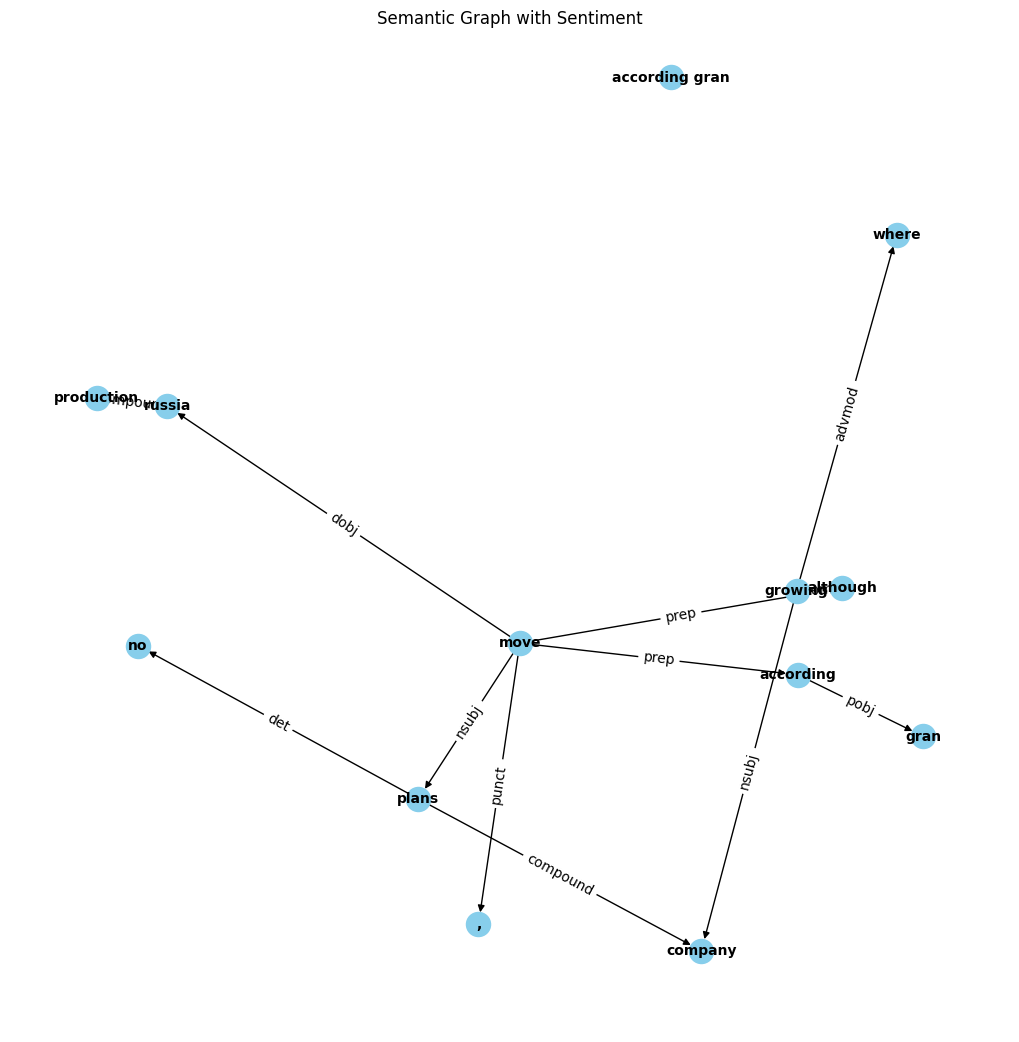

In [ ]:
sample_text = df['Cleaned_Sentence'][0]  # Example sentence
sample_sentiment = df['Sentiment'][0]    # Sentiment of the sentence
semantic_graph = create_semantic_graph_with_sentiment(sample_text, sample_sentiment)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(semantic_graph)
nx.draw(semantic_graph, pos, with_labels=True, node_color="skyblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(
    semantic_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in semantic_graph.edges(data=True)})
plt.title("Semantic Graph with Sentiment")
plt.show()


,Unnamed: 0,Sentiment,Sentence
0,0,0,"According to Gran , the company has no plans t..."
1,1,1,"For the last quarter of 2010 , Componenta 's n..."
2,2,1,"In the third quarter of 2010 , net sales incre..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


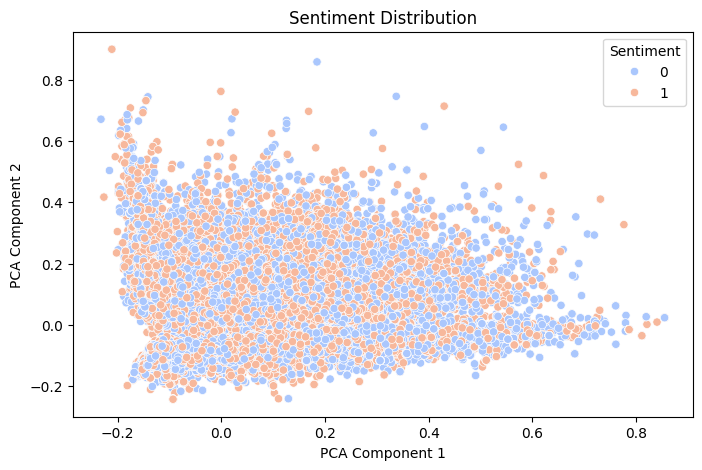

Mean Squared Error: 1.009504958412233


,Sentence,Sentiment,Predicted_Stock_Performance
0,Chip change could mean cheaper Apple Macs,0,-0.069535
1,UK: Health inequality as severe as during the ...,1,-0.037260
2,Mark Gould on a welfare-to-work scheme in Shef...,0,0.005793
3,You Are Nobody: Thousands find themselves stat...,0,-0.035889
4,NASA announces discovery of flowing water in Mars,0,0.057749


Correlation between Sentiment and Predicted Stock Performance: -0.004616956526925124


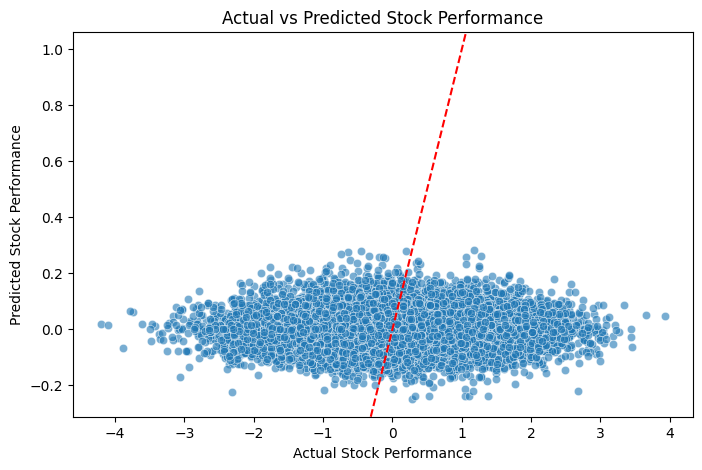

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
data_path = "Sentiment_Stock_data.csv"
df = pd.read_csv(data_path)

# Check data structure
display(df.head())

# Handle missing values
df['Sentence'] = df['Sentence'].fillna("")

# Sample 500 sentences for faster processing
df = df.sample(n=min(111294, len(df)), random_state=42).reset_index(drop=True)

# Convert text to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=300)
X = vectorizer.fit_transform(df['Sentence']).toarray()

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualization of Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Sentiment')
plt.show()

# Hypothetical stock performance impact analysis
df['Stock_Performance'] = np.random.randn(len(df))  # Placeholder for real stock data

# Prepare data for regression
X_train, X_test, y_train, y_test = train_test_split(X, df['Stock_Performance'], test_size=0.2, random_state=42)

# Train a simple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display stock performance predictions
df['Predicted_Stock_Performance'] = regressor.predict(X)
display(df[['Sentence', 'Sentiment', 'Predicted_Stock_Performance']].head())

# Additional Qualitative Analysis
correlation = np.corrcoef(df['Sentiment'], df['Predicted_Stock_Performance'])[0, 1]
print(f"Correlation between Sentiment and Predicted Stock Performance: {correlation}")

# Visualization of Predicted vs Actual Stock Performance
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Stock Performance")
plt.ylabel("Predicted Stock Performance")
plt.title("Actual vs Predicted Stock Performance")
plt.axline([0, 0], [1, 1], color='red', linestyle='--')
plt.show()


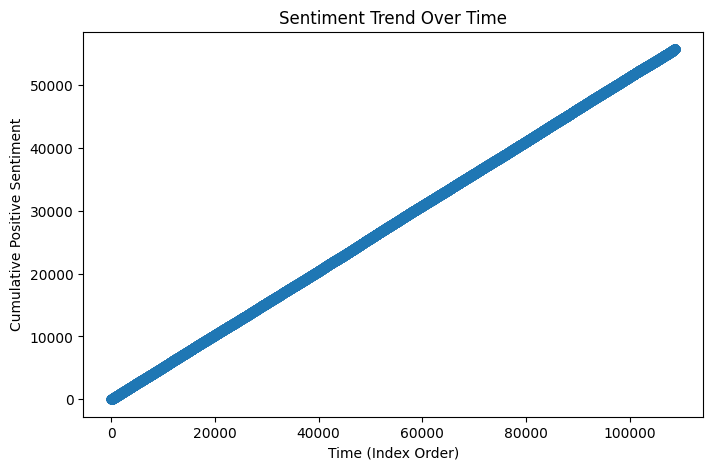

Top keywords associated with sentiment:
new: 4080
says: 3249
world: 2975
year: 2592
china: 2332
government: 2312
police: 2256
israel: 2246
000: 2158
people: 2125


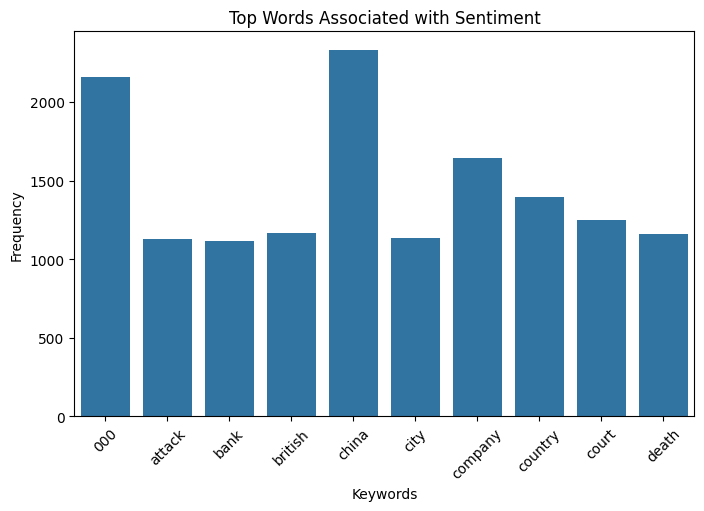

Positive Sentiment Ratio: 0.51
The sentiment is mixed, indicating uncertainty in stock movement.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Load data
data_path = "Sentiment_Stock_data.csv"
df = pd.read_csv(data_path)

# Handle missing values
df['Sentence'] = df['Sentence'].fillna("")

# Sample 500 sentences for faster processing
df = df.sample(n=min(111294, len(df)), random_state=42).reset_index(drop=True)

# Sentiment Trend Analysis
df['Cumulative_Sentiment'] = df['Sentiment'].cumsum()
plt.figure(figsize=(8, 5))
plt.plot(df.index, df['Cumulative_Sentiment'], marker='o', linestyle='-')
plt.xlabel("Time (Index Order)")
plt.ylabel("Cumulative Positive Sentiment")
plt.title("Sentiment Trend Over Time")
plt.show()

# Keyword-Based Insights
vectorizer = CountVectorizer(stop_words='english', max_features=50)
word_counts = vectorizer.fit_transform(df['Sentence'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), np.asarray(word_counts.sum(axis=0)).ravel()))

# Display top keywords
print("Top keywords associated with sentiment:")
for word, freq in Counter(word_freq).most_common(10):
    print(f"{word}: {freq}")

# Sentiment Distribution by Keywords
plt.figure(figsize=(8, 5))
sns.barplot(x=list(word_freq.keys())[:10], y=list(word_freq.values())[:10])
plt.xticks(rotation=45)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Top Words Associated with Sentiment")
plt.show()

# Future Stock Prediction (Qualitative Analysis)
positive_ratio = df['Sentiment'].mean()
print(f"Positive Sentiment Ratio: {positive_ratio:.2f}")

if positive_ratio > 0.6:
    print("The sentiment trend suggests positive market reactions. The stock is likely to perform well.")
elif positive_ratio < 0.4:
    print("The sentiment trend suggests negative market reactions. The stock may face a downturn.")
else:
    print("The sentiment is mixed, indicating uncertainty in stock movement.")
